# License
## Copyright (c) 2024 robert.bhero@gwu.edu, shepherd.chikwawawa@gwu.edu, pamela.chirwa@gwu.edu
## MIT License
Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

### 📦 Import required libraries

In [1]:

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor


### 📐 Define RMSLE metric for evaluation

In [2]:

def calculate_rmsle(actual, predicted):
    actual = np.maximum(np.array(actual), 0)
    predicted = np.maximum(np.array(predicted), 0)
    rmsle = np.sqrt(np.mean((np.log1p(predicted) - np.log1p(actual))**2))
    return rmsle


### 📂 Load the training and test datasets

In [3]:

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Drop target and ID columns from training data
X = train_data.drop(['SalePrice', 'Id'], axis=1)
y = train_data['SalePrice']


### 🔍 Identify numeric and categorical features

In [4]:

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns


### ⚙️ Define preprocessing pipelines for numeric and categorical features

In [5]:

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing numeric values with mean
    ('scaler', StandardScaler())                  # Standardize numeric features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing categorical values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # One-hot encode categorical features
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])


### 🤖 Train Ridge Regression model with cross-validation

In [6]:

ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))  # Ridge regression with regularization
])

# Perform 5-fold cross-validation and print mean RMSE
scores = cross_val_score(ridge_model, X, y, scoring='neg_root_mean_squared_error', cv=5)
print("Ridge RMSE (Cross-Validation):", -scores.mean())


Ridge RMSE (Cross-Validation): 32207.833553985867


### 📊 Fit model on full training data and predict on test data

In [8]:

ridge_model.fit(X, y)

# Drop ID column from test data
X_test = test_data.drop(['Id'], axis=1)

# Predict and save results
predictions = ridge_model.predict(X_test)
submission = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': predictions})
submission.to_csv('ridge_submission.csv', index=False)
print("Predictions saved to ridge_submission.csv")


Predictions saved to ridge_submission.csv


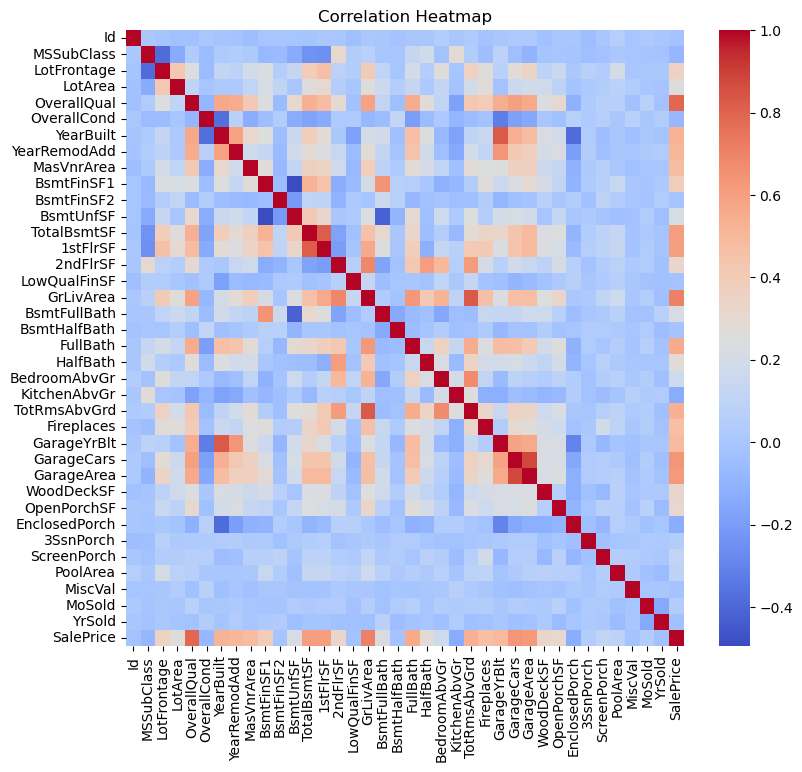

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the training dataset
train_data = pd.read_csv('train.csv')

# Select only numeric columns
numeric_data = train_data.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Draw the heatmap without numbers
plt.figure(figsize=(9, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()